# GARCH time series, posterior predictive distributions $p(x_n | x_{n-i...}, D)$ and $p(x_{n} | x_{n+i...}, D')$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from typing import Optional, List, Tuple

In [2]:
from bayesian import BayesianThreeFCLayers, prepare_simple_1d_time_series, ExperimentResults
from generate_time_series import load_garch_time_series

In [3]:
!ls '20230724_preds/garch03/'

noisy_ts.torch		   targets_b.torch  windows_b.torch
predictive.backward.torch  targets_f.torch  windows_f.torch
predictive.forward.torch   ts.torch


In [5]:
res = ExperimentResults("20230724_preds/garch03/")

In [6]:
def sorted_predictions(targets: torch.Tensor,
                       pred_obs: torch.Tensor) -> Tuple:
    sorted_pairs_true_pred = sorted(zip(targets.squeeze(-1), pred_obs.squeeze(-1)))
    true = [x.cpu().item() for x, _ in sorted_pairs_true_pred]
    pred_all = [x for _, x in sorted_pairs_true_pred]
    pred_mean = torch.tensor([x.mean().cpu().item() for x in pred_all])
    pred_std = torch.tensor([x.std().cpu().item() for x in pred_all])
    return true, pred_all, pred_mean, pred_std

In [7]:
def plot_predictions(true: torch.Tensor,
                     pred_all: Optional[List[torch.Tensor]] = None,
                     pred_mean: Optional[torch.Tensor] = None,
                     pred_std: Optional[torch.Tensor] = None,
                     show: bool = False,
                     title: str = "GARCH predictive, sorted values") -> plt.Axes:
    fig, ax = plt.subplots()

    if pred_all is not None:
        for pred_onedraw in torch.stack(pred_all).T:
            ax.plot(pred_onedraw, alpha=0.2, color="green")

    if pred_std is not None and pred_mean is not None:
        ax.fill_between((pred_mean - 3 * pred_std).squeeze(-1),
                        (pred_mean + 3 * pred_std).squeeze(-1),
                        alpha=0.6, color='#86cfac', zorder=5)

    if pred_mean is not None:
        ax.plot(pred_mean, '-', linewidth=3, color="red", label="predictive mean")
    
    ax.plot(true, 'b-', linewidth=3, label="true value")
    
    ax.set_xlabel("index")
    ax.set_ylabel("target value")
    ax.set_title(title)
    ax.grid()
    ax.legend()

    if show:
        fig.show()

    return fig, ax

## Forward

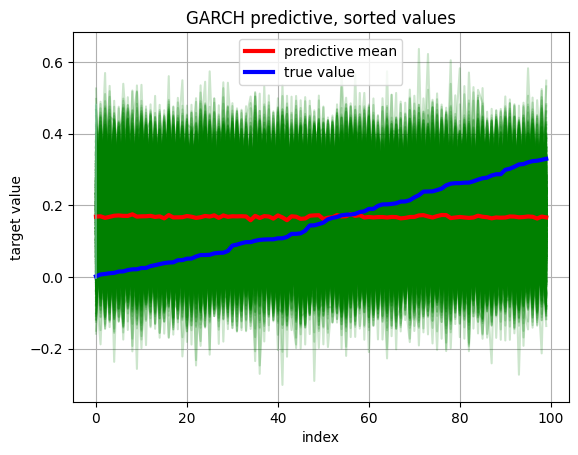

In [8]:
true, pred_all, pred_mean, pred_std = sorted_predictions(res.targets_f, res.pred_obs_f)
fig, ax = plot_predictions(true, pred_all, pred_mean, pred_std)

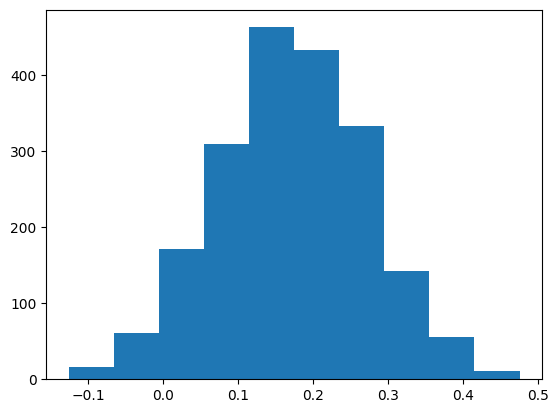

In [13]:
plt.hist(pred_all[5])
plt.show()

## Backward

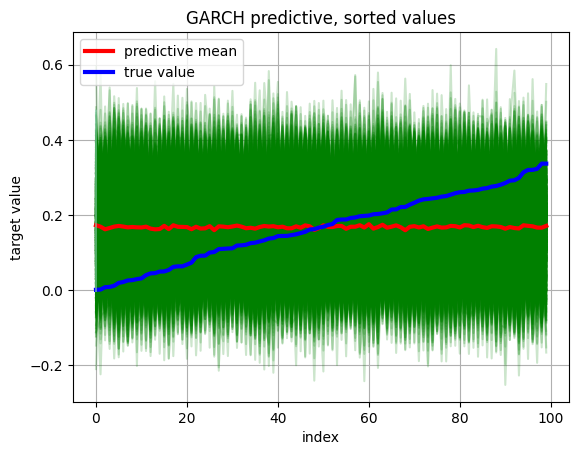

In [8]:
true, pred_all, pred_mean, pred_std = sorted_predictions(res.targets_b, res.pred_obs_b)
fig, ax = plot_predictions(true, pred_all, pred_mean, pred_std)